In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from matplotlib.colors import Normalize
%matplotlib inline

In [58]:
df = pd.read_csv('titanic.csv')
df.info()
print(df['Age'].mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
29.69911764705882


In [59]:
#checking how many null values in each column
print(df.isnull().sum())
#no duplicates
print("duplicates: ", df.duplicated().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
duplicates:  0


In [60]:
print(df['Embarked'])
df['Embarked'].describe()
print(df['Ticket'])
df['Ticket'].describe()

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object
0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object


count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [61]:
#editing columns and dropping columns
df.drop(['Cabin'], axis=1, inplace=True)
df.drop(['Ticket'], axis=1, inplace=True)
df.drop(['Name'], axis=1, inplace=True)
df['Sex'] = df['Sex'].map({'female':0,'male':1})
df.dropna(subset=['Embarked'], inplace=True)
df['Embarked'] = df['Embarked'].map({'S':0, 'C': 1, 'Q': 2})
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          712 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.6 KB


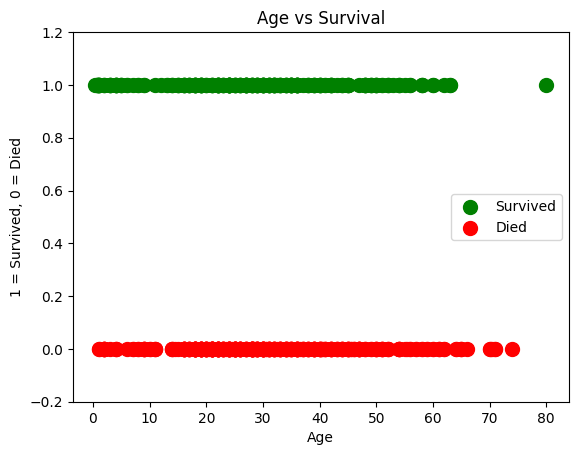

In [62]:
# Scatter plot for survivors
plt.scatter(df[df['Survived'] == 1]['Age'], df[df['Survived'] == 1]['Survived'],
            color='green', label='Survived', s=100)

# Scatter plot for non-survivors
plt.scatter(df[df['Survived'] == 0]['Age'], df[df['Survived'] == 0]['Survived'],
            color='red', label='Died', s=100)

plt.xlabel('Age')
plt.ylabel('1 = Survived, 0 = Died')
plt.title('Age vs Survival')
plt.legend()

#just for wider margins
plt.ylim(-0.2, 1.2)

plt.show()

In [63]:
#make null values average age of all values that are not null
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.6 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.6 KB


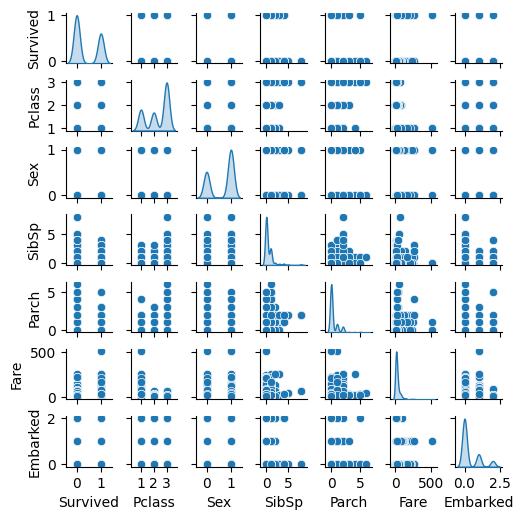

In [64]:
sns.pairplot(data=df, vars=['Survived','Pclass','Sex','SibSp','Parch','Fare','Embarked'], diag_kind='kde',height=.75)
df.info()

<Axes: >

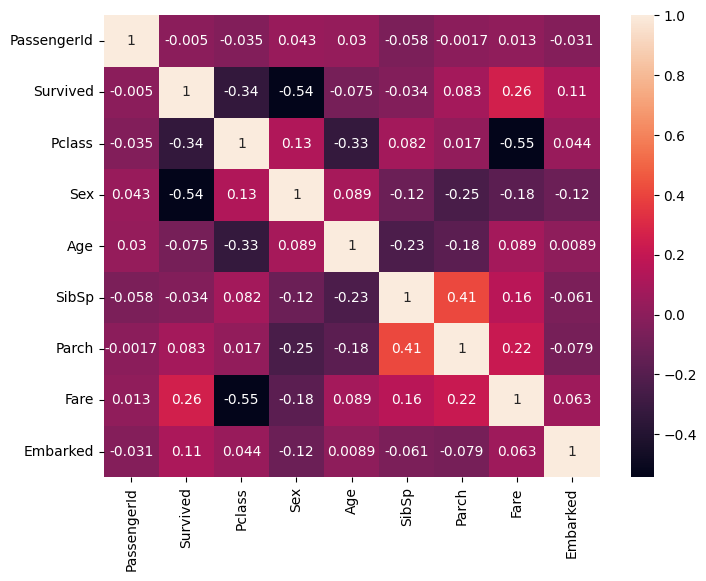

In [65]:
fig, ax = plt.subplots(figsize=(8,6)) 
sns.heatmap(data=df.corr(), annot=True,robust=True, ax=ax)

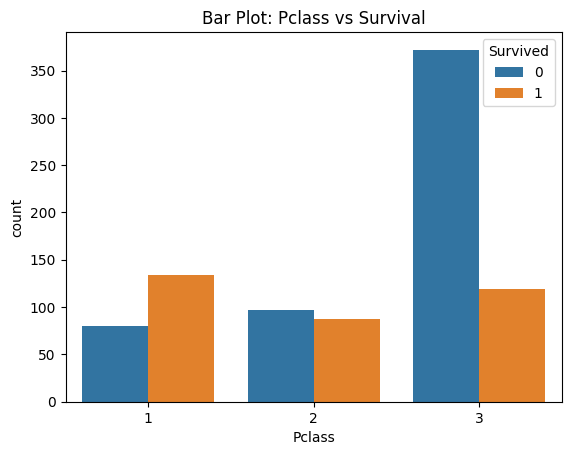

In [66]:
data = df[['Pclass','Survived']]
sns.countplot(data=data, x='Pclass', hue='Survived')
plt.title('Bar Plot: Pclass vs Survival')
plt.show()

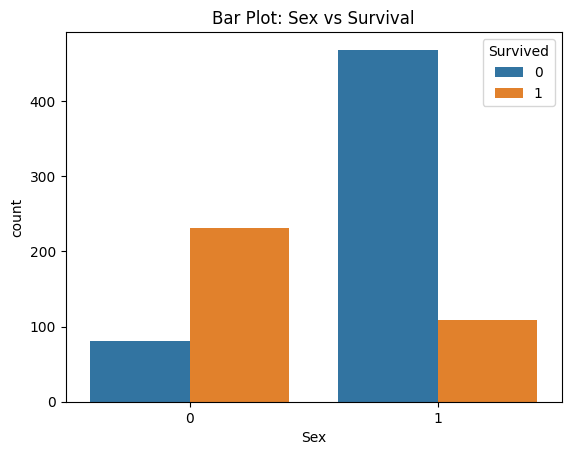

In [67]:
data = df[['Sex','Survived']]
sns.countplot(data=data, x='Sex', hue='Survived')
plt.title('Bar Plot: Sex vs Survival')
plt.show()

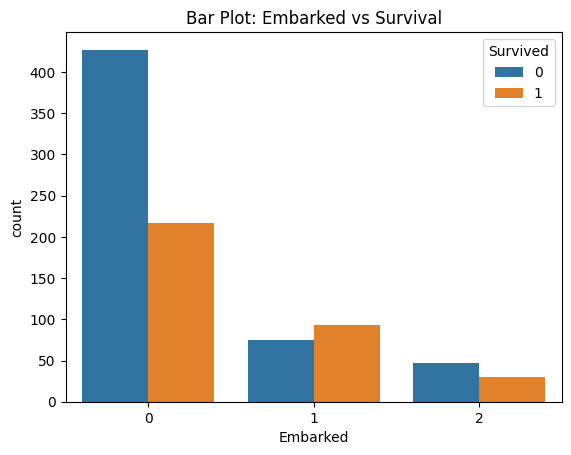

In [68]:
data = df[['Embarked','Survived']]
sns.countplot(data=data, x='Embarked', hue='Survived')
plt.title('Bar Plot: Embarked vs Survival')
plt.show()

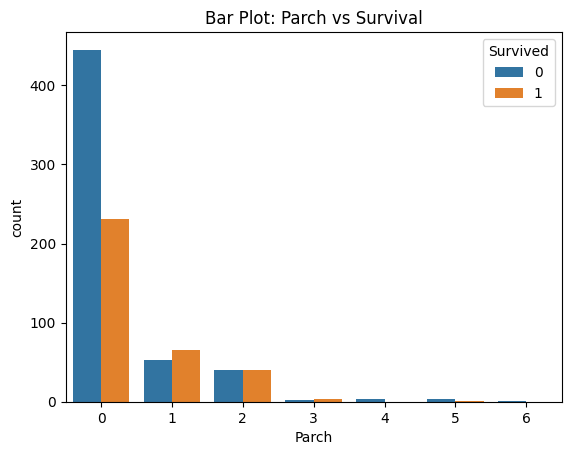

In [69]:
data = df[['Parch','Survived']]
sns.countplot(data=data, x='Parch', hue='Survived')
plt.title('Bar Plot: Parch vs Survival')
plt.show()

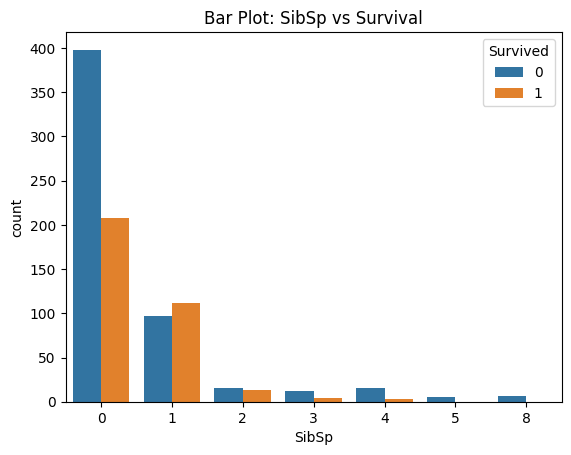

In [70]:
data = df[['SibSp','Survived']]
sns.countplot(data=data, x='SibSp', hue='Survived')
plt.title('Bar Plot: SibSp vs Survival')
plt.show()

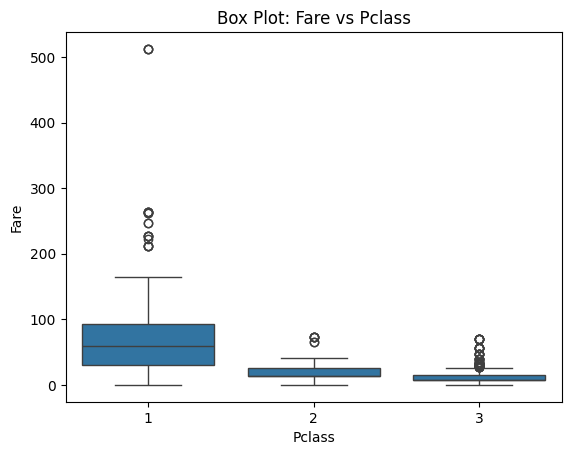

In [71]:
data = df[['Pclass','Fare']]
sns.boxplot(data=data, x='Pclass', y='Fare')
plt.title('Box Plot: Fare vs Pclass')
plt.show()

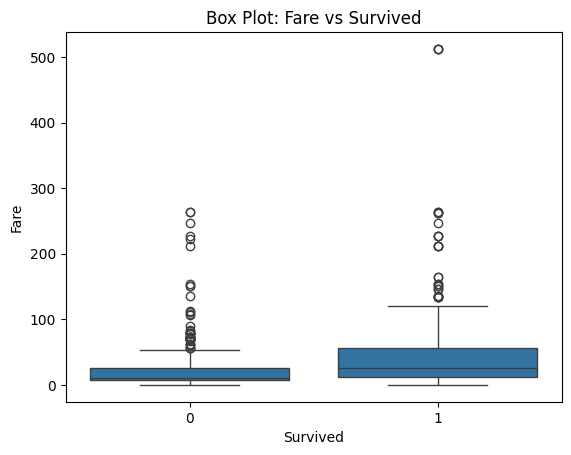

In [72]:
data = df[['Survived','Fare']]
sns.boxplot(data=data, x='Survived', y='Fare')
plt.title('Box Plot: Fare vs Survived')
plt.show()

In [73]:
#Cramer for Pclass Feature
contingency_table = pd.crosstab(df['Pclass'], df['Survived'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1 
cramers_v = np.sqrt(chi2 / (n * min_dim))
print(f"Cramér's V for Pclass: {cramers_v}")

#Cramer for Embarked Feature
contingency_table = pd.crosstab(df['Embarked'], df['Survived'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1 
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(f"Cramér's V for Embarked: {cramers_v}")

#Cramer for Sex Feature
contingency_table = pd.crosstab(df['Sex'], df['Survived'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1 
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(f"Cramér's V for Sex: {cramers_v}")

#Cramer for SibSp Feature
contingency_table = pd.crosstab(df['SibSp'], df['Survived'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1 
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(f"Cramér's V for SibSp: {cramers_v}")

Cramér's V for Pclass: 0.33702931560028576
Cramér's V for Embarked: 0.17261682709984438
Cramér's V for Sex: 0.5391600875919571
Cramér's V for SibSp: 0.20604298173288535


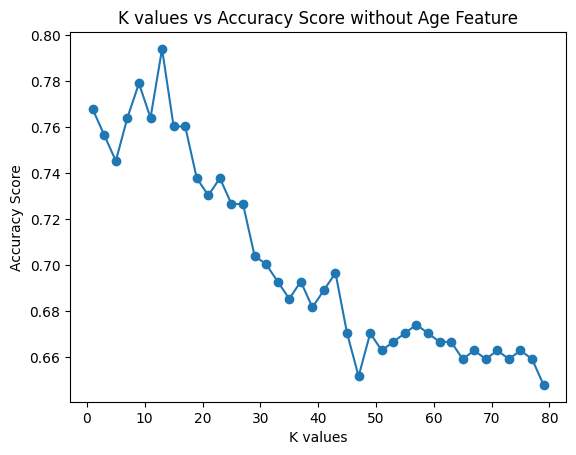

Max Accuracy =  0.7940074906367042
K value =  13


In [74]:
# Features I want to use
# I also changed this set to not include Age, but right now it does include Age
X = df[['Sex', 'Pclass', 'SibSp', 'Embarked', 'Age']]
#survived for Y
Y = df['Survived'] 

# Test and training data split 30/70
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=12)

#Train KNN model with different values of K and compare accuracies
accuracy_values = []
k_values = []
max_accuracy = 0
max_k = 0

for i in range (1,80,2):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,Y_train)

    Y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_pred, Y_test)
    accuracy_values.append(accuracy)
    k_values.append(i)
    if max_accuracy < accuracy:
        max_accuracy = accuracy
        max_k = i

plt.plot(k_values, accuracy_values, marker='o')  # 'marker' adds points to the plot, and 'plot()' connects them with lines
plt.title('K values vs Accuracy Score without Age Feature')
plt.xlabel('K values')
plt.ylabel('Accuracy Score')

# Show the plot
plt.show()
print('Max Accuracy = ', max_accuracy)
print('K value = ', max_k)

In [75]:
#These functions were used in lab 6 and was pasted here
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
        
def plotSearchGrid(grid):
    
    scores = [x for x in grid.cv_results_["mean_test_score"]]
    scores = np.array(scores).reshape(len(grid.param_grid["C"]), len(grid.param_grid["gamma"]))

    plt.figure(figsize=(8, 6))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap= plt.cm.hot,
               norm=MidpointNormalize(vmin=0.75, midpoint=0.92))
    plt.xlabel('gamma')
    plt.ylabel('C')
    plt.colorbar()
    plt.xticks(np.arange(len(grid.param_grid["gamma"])), grid.param_grid["gamma"], rotation=45)
    plt.yticks(np.arange(len(grid.param_grid["C"])), grid.param_grid["C"])
    plt.title('Validation accuracy')
    plt.show()

from IPython.core.display import HTML
HTML("""
<style>
.MathJax nobr>span.math>span{border-left-width:0 !important};
</style>
""")

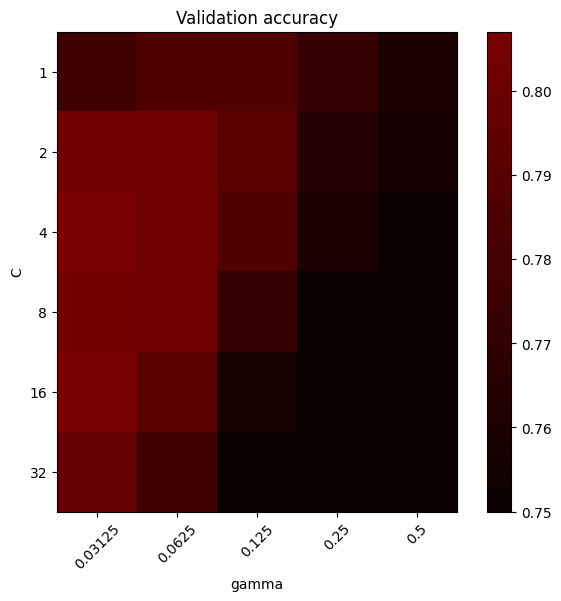

Best Parameters: {'C': 4, 'gamma': 0.03125}
CV Score 80.70497336801684


In [76]:
#Trying SVM Model 
x1 = list(range(-5, 0))
x = [2 ** i for i in x1]
y1 = list(range(0, 6))
y = [2 ** i for i in y1]
parameters = {'gamma':x, 'C':y}
svc = SVC(kernel='rbf')
grid = GridSearchCV(svc, parameters, cv=3, scoring='accuracy')
grid.fit(X_train,Y_train)

plotSearchGrid(grid)

print("Best Parameters:", grid.best_params_)
print("CV Score", grid.best_score_ * 100)

In [77]:
#using best hyperparameters for model and creating prediction and accuracy score
svc = SVC(kernel='rbf', gamma=0.03125, C=4)
svc.fit(X_train, Y_train)
pred = svc.predict(X_test)
print("accuracy = ", accuracy_score(pred, Y_test))

accuracy =  0.8014981273408239


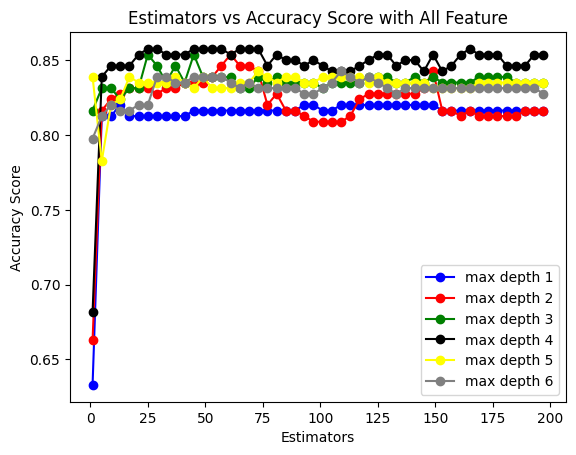

max accuracy =  0.8202247191011236 for max_depth =  1
estimator =  13 for max_depth =  1
max accuracy =  0.8539325842696629 for max_depth =  2
estimator =  61 for max_depth =  2
max accuracy =  0.8539325842696629 for max_depth =  3
estimator =  25 for max_depth =  3
max accuracy =  0.8576779026217228 for max_depth =  4
estimator =  25 for max_depth =  4
max accuracy =  0.8426966292134831 for max_depth =  5
estimator =  73 for max_depth =  5
max accuracy =  0.8426966292134831 for max_depth =  6
estimator =  109 for max_depth =  6


In [78]:
colors = ['blue','red','green','black','yellow','grey']
max_depth = [1,2,3,4,5,6]
max_accuracy_array = []
max_estimator_array = []
for j in range (1,len(max_depth) + 1):
    estimators = []
    accuracies = []
    max_accuracy = 0
    estimator = 0
    
    #loop over different estimator numbers and see how accuracy changes for Random Forest Classifier. 
    for i in range (1, 201, 4):
        model = RandomForestClassifier(n_estimators = i, max_depth = j, random_state = 12)
        model.fit(X_train, Y_train)
        pred = model.predict(X_test)
        accuracy = accuracy_score(Y_test, pred)
        accuracies.append(accuracy)
        estimators.append(i)
        if max_accuracy < accuracy:
            max_accuracy = accuracy
            estimator = i
    #adds plot line for new max depth
    plt.plot(estimators, accuracies, marker='o', color=colors[j-1], label='max depth {}'.format(j))
    plt.title('Estimators vs Accuracy Score with All Feature')
    plt.xlabel('Estimators')
    plt.ylabel('Accuracy Score')
    max_accuracy_array.append(max_accuracy)
    max_estimator_array.append(estimator)
    
# Show the plot after the plots of all max_depth results are added 
plt.legend()
plt.show()
for i in range (0,len(max_depth)):
    print("max accuracy = ", max_accuracy_array[i], "for max_depth = ", max_depth[i])
    print("estimator = ", max_estimator_array[i], "for max_depth = ", max_depth[i])






In [79]:
# This is for the Kaggle Competition
X_train = df[['Sex', 'Pclass', 'SibSp', 'Embarked', 'Age']]
Y_train = df[['Survived']]
model = RandomForestClassifier(n_estimators = 25, max_depth = 4, random_state = 12)
model.fit(X_train, Y_train)

#import test set
df_test = pd.read_csv('test.csv')
df_test['Age'] = df_test['Age'].fillna(df['Age'].mean())
df_test['Sex'] = df['Sex'].map({'female':0,'male':1})
df_test['Embarked'] = df['Embarked'].map({'S':0, 'C': 1, 'Q': 2})
pred = model.predict(df_test[['Sex', 'Pclass', 'SibSp', 'Embarked', 'Age']])
id_test = df_test['PassengerId'].values

# new dataframe for output file for competition
output_df = pd.DataFrame({
    'PassengerId': id_test,
    'Survived': pred
})

output_df.info()
output_df.to_csv('submission1.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
